# Python for R Users
- Author: Sylvia Tran
- Date: September 9, 2019

[GitHub Reference](https://github.com/godsylla/python-for-R-users)

![alt text][python-and-r]

[python-and-r]: https://github.com/godsylla/python-for-R-users/blob/master/assets/python-are-r-friends.png?raw=true "Python"

### Introduction

This notebook is a tutorial on Python for R Users. The intention is to help draw some similarities between Python and R in the hope that those new to Python will find it less initmidating, and overall more approachable.

This is an interactive Python notebook (.ipynb) in the repository that is available to run in Jupyter Notebook (using Anaconda for e.g.) that uses a Python3 kernel. Additionally, there is an attached python script (`python-for-r-users.py`) that contains the code without any of the markdown cells.

The content covered will leverage the following packages:

- [pandas](https://pandas.pydata.org/pandas-docs/stable/) (for data frame shaping, cleaning)
- [numpy](https://docs.scipy.org/doc/numpy/reference/index.html) (for any numeric python required)
- [scikit learn](https://scikit-learn.org/stable/user_guide.html) (for train-test-splitting, feature-scaling, modeling, model metrics)

Should you wish to explore these packages more, please refer to the documentation online. There are ample examples for each as these three are widely used in the field of data science and data analysis. Notably, when using Python, numpy, pandas, or scikit learn for data analysis or data science, please take care to read documentation carefully as there are at times nuanced differences with regard to what is happening in the source code that might result in different than expected behavior when implementing same/similar tasks in R.

### Table of Contents:
  1. Importing Packages
  2. Loading Toy Datasets (sklearn)
      - detour
  3. Cursory Inspection (pandas & numpy)
  4. Light Cleaning (base python, pandas)
  5. Train-test-split (sklearn)
  6. Feature Scaling (sklearn)
  7. Model (sklearn)

### 1. Importing Packages
![alt text][importing]

[importing]: https://github.com/godsylla/python-for-R-users/blob/master/assets/importing.jpg?raw=true "Importing"

- R: `library('package_name')`
- Python: `import package_name` or 
- `from package_name import <the_thing_you_want>` 

If the module does not exist, you can use 
* `pip install package_name`
* `!pip install package_name` (to install in Jupyter notebook)

Note: I strongly recommend working in a virtual environment so as not to mess up your .bashrc or .bash_profile when running pip install or brew cask install commands

In [1]:
# The `np` and `pd` nicknames are convention
import numpy as np
import pandas as pd

### 2. Loading Toy Datasets

* R: typically found in the `datasets` package
* Python: we'll be using toy datasets from `sklearn.datasets` package. 

Since it's a package we'll be pulling our dataset from, we'll be implementing what we just learned (importing packages).

**At the risk of having this kind of effect on the audience... I shall proceed anyway**

![](https://media.giphy.com/media/ekvjSltNbJFtRG4V22/giphy.gif)

But hey! It's an INTRO, so you all have to suffer this with me

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print('boston: ', type(boston))            # R: print(class(boston))

# To access the data for a sklearn toy dataset, we need to add `.data` 
# Simultaneously convert this to a pandas DataFrame
boston_df = pd.DataFrame(boston.data)
print('boston_df: ', type(boston_df))

boston:  <class 'sklearn.utils.Bunch'>
boston_df:  <class 'pandas.core.frame.DataFrame'>


In [3]:
# With toy datasets, you can print the description based on the sklearn.utils.Bunch object 
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [4]:
# Get a sense of the types & null count
display(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


None

In [5]:
# Inspect the dataframe 
display(boston_df.shape)

# Show top 5 (.tail() for last 5),
# Use .sample() to randomly select 1 sample 
# Can also specify #s in b/t the parens
display(boston_df.head())

# Rename the columns using the feature_names:
# zip is a built-in Python function, make it your friend
boston_df.rename(columns=dict(zip(boston_df.columns, boston.feature_names)), inplace=True)
display(boston_df.head())

# Get the target for your regression model
boston_y = boston.target

(506, 13)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Get summary statistics on the dataframe
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### We're going to take a detour because there are slightly more interesting data sets with which to demo
![alt text][detour]

[detour]: https://github.com/godsylla/python-for-R-users/blob/master/assets/detour.jpg?raw=true "Detour"


#### More specifically, we're going to use a slightly more popular dataset

![](https://media.giphy.com/media/PqMTE3jpTKxXi/giphy.gif)

### 2. Read in the data using `pandas`

#### B E E R
![](https://media.giphy.com/media/3og0IUU8wsktr7quoU/giphy.gif)

**About the data:** 
https://www.kaggle.com/nickhould/craft-cans

| Alpha v. Numeric        | Column Name           | Comment  |
| ------------- |:-------------:| -----:|
| #      | abv | The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol |
| #      | ibu      | ibuInternational bittering units, which describe how bitter a drink is |
| # | id      | Unique ID |
| A      | name | name of the beer |
| A      | style      | Beer style (lager, ale, IPA, etc.) |
| # | brewery id      | Unique identifier for brewery that produces this beer; can use to join with brewery info |
| # | ounces      | size of beer in ounces |


![](https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif)

In [7]:
# READ IN THE DATA

# Unzip the zip file
from zipfile import ZipFile

# Specify the directory where the zipfile is saved
# Read in the zip file `r`
with ZipFile('../data/craft-cans.zip', 'r') as zipObject:
    # specify the directory where you want the unzipped files to be
    zipObject.extractall('../data/')
    
# Use pandas to read in the csv files
beers_df = pd.read_csv('../data/beers.csv')

### 3. Cursory Data Inspection

**Let's begin!**
![](https://media.giphy.com/media/3ohs4ruO9hBMDRbOne/giphy.gif)

In [8]:
# CURSORY INSPECTION USING BUILT-IN PANDAS FUNCTIONS ON THE DATAFRAME OBJECT

# .head() and .tail() default to top 5, can specify a #
# .sample() defaults to selecting a random row, unless a different # is specified
display(beers_df.head())

# null value count & types
display(beers_df.info())

beers_df.drop('Unnamed: 0', axis=1, inplace=True)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
Unnamed: 0    2410 non-null int64
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.7+ KB


None

In [9]:
# summary stats for numeric columns only
display(beers_df.describe())

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [10]:
beers_df['style'].value_counts()[:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

### 4. Light Data Cleaning

![](https://media.giphy.com/media/3oKIPCSX4UHmuS41TG/giphy.gif)

In [11]:
# standard nicknames for importing python vizualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

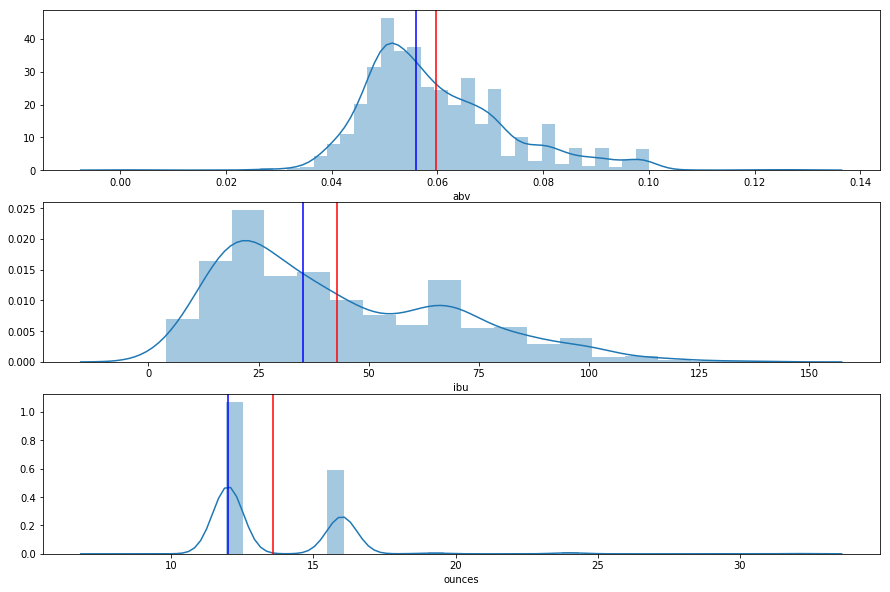

In [12]:
# Python list (indexing begins with 0, NOT 1)
cols_to_plot = ['abv', 'ibu', 'ounces']

fig = plt.figure(1, figsize=(15, 10))
# enuemrate - built-in Python function lets you loop once to get the & item from an iterable
for i, column in enumerate(cols_to_plot):
    # add 1 because Python indexing begins with 0 & subplot count starts with 1
    fig.add_subplot(3, 1, i+1)
    
    # plots will not accept columns if they have null values
    sns.distplot(beers_df[column].dropna())
    
    # .mean() and .median() will return the mean and median for non-null values
    plt.axvline(beers_df[column].mean(), c='r')
    plt.axvline(beers_df[column].median(), c='b')
    
plt.show()

In [13]:
# Using pandas dataframe built-in functions

# Filling null values
beers_df['abv'] = beers_df['abv'].fillna(beers_df['abv'].median())
beers_df['ibu'] = beers_df['ibu'].fillna(beers_df['ibu'].mean())

# Drop rows w/ null values
beers_df = beers_df.dropna()

# Let's check to see:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 2409
Data columns (total 7 columns):
abv           2405 non-null float64
ibu           2405 non-null float64
id            2405 non-null int64
name          2405 non-null object
style         2405 non-null object
brewery_id    2405 non-null int64
ounces        2405 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 150.3+ KB


In [14]:
display(beers_df.head(3))

# Let's say we want to get the set of unique beer types (not combinations):
# set() type

unique_styles = set()
for style in beers_df['style'].unique().tolist():
    if '/' in style:
        unique_styles.update(style.split('/ '))
    else:
        unique_styles.add(style)
print('number of unique styles: ', len(unique_styles))        

# select 5 to randomly inspect using numpy.random.choice(iterable, number_of_samples)        
print('5 random styles: ', np.random.choice(list(unique_styles), 5))

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0


number of unique styles:  113
5 random styles:  ['American Dark Wheat Ale' 'Märzen ' 'Chile Beer' 'Herbed '
 'English Barleywine']


### 5. Train Test Splitting

- Splits are random, so make sure to use random_state to seed the split

![](https://media.giphy.com/media/VWOHCm2pwQFna/giphy.gif)

In [15]:
# Separate target from features
dummies_df = pd.get_dummies(beers_df.drop(['id', 'name', 'brewery_id'], axis=1), 
                            columns=['style'])
display(dummies_df.head())
X = dummies_df.drop('abv', axis=1)

y = dummies_df['abv']

,abv,ibu,ounces,style_Abbey Single Ale,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,...,style_Schwarzbier,style_Scotch Ale / Wee Heavy,style_Scottish Ale,style_Shandy,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Wheat Ale,style_Winter Warmer,style_Witbier
0,0.050,42.713167,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.066,42.713167,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.071,42.713167,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.090,42.713167,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.075,42.713167,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print(' ')
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (1803, 101)
y train shape:  (1803,)
 
X test shape:  (602, 101)
y test shape:  (602,)


### 6 & 7. Feature Scaling & Modeling

Note: there are nuanced differences between very similar package functions in R vs. Python's sklearn. Please make sure you are reading the documentation for the respective package thoroughly to understand what's happening when you use them. **Some of these nuanced differences explain why you'll get very different results using R's caret & various models vs. Python's sklearn package.**


Reference for putting it all together
- https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html


This portion of the presentation's gonna go like this: 
![](https://media.giphy.com/media/ZzvmSrCZS7uco/giphy.gif)


**Note: The below code is only to demonstrate how to use sklearn, not for minimizing loss.**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rfreg', RandomForestRegressor(random_state=42, verbose=0))
])

grid_params = {
    'rfreg__n_estimators':[10, 15, 20]
}

my_gridsearch = GridSearchCV(rfr_pipe, grid_params, verbose=0, cv=5, n_jobs=-1)

In [18]:
gs_obj = my_gridsearch.fit(X_train, y_train)
gs_obj

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfreg', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...stimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rfreg__n_estimators': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print('best estimator: ' , gs_obj.best_estimator_, ' ')
print('best parameters: ', gs_obj.best_params_, ' ')
print('best score: ', gs_obj.best_score_)

best estimator:  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfreg', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])  
best parameters:  {'rfreg__n_estimators': 20}  
best score:  0.5099904012863419


In [20]:
# How to access the methods & attributes of the estimator:

# This returns a dictionary object
print(gs_obj.best_estimator_.named_steps)

# Access the dictionary value by using the key: 'rfreg'
print(gs_obj.best_estimator_.named_steps['rfreg'])

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'rfreg': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [21]:
# Inspect all cross-validated results and convert to a DataFrame 
cv_results = pd.DataFrame(gs_obj.cv_results_).T
cv_results

,0,1,2
mean_fit_time,0.148153,0.190529,0.202432
std_fit_time,0.00481926,0.0155914,0.0144757
mean_score_time,0.00431609,0.0040329,0.00361676
std_score_time,0.000951393,0.000728139,0.000433077
param_rfreg__n_estimators,10,15,20
params,{'rfreg__n_estimators': 10},{'rfreg__n_estimators': 15},{'rfreg__n_estimators': 20}
split0_test_score,0.480426,0.481119,0.475745
split1_test_score,0.493435,0.50101,0.508492
split2_test_score,0.55565,0.568178,0.567029
split3_test_score,0.489246,0.503648,0.508428


In [22]:
# Get feature importances
feat_imptc = gs_obj.best_estimator_.named_steps['rfreg'].feature_importances_

# Zip w/ column names & sort, display top 10
sorted(list(zip(feat_imptc, X.columns)), reverse=True)[:10]

[(0.3872775325556909, 'ibu'),
 (0.12343409124864957, 'style_American Double / Imperial IPA'),
 (0.055605945922409486, 'ounces'),
 (0.036116643290090074, 'style_American IPA'),
 (0.03243970476519702, 'style_Tripel'),
 (0.02940026412638163, 'style_American Double / Imperial Stout'),
 (0.0276345369639348, 'style_Quadrupel (Quad)'),
 (0.021941061398495918, 'style_Russian Imperial Stout'),
 (0.015628040366609898, 'style_Scotch Ale / Wee Heavy'),
 (0.014483013538822526, 'style_Winter Warmer')]

In [23]:
# mse for test (validation) data
test_score = gs_obj.best_estimator_.score(X_test, y_test)
test_score

0.5198763128313273

### Don't Stop Here!
![](https://media.giphy.com/media/3o6gb28FpUz2skMRc4/giphy.gif)


#### Additional Resources can be found here:

- [Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/)
- [Scikit Learn - More Documentation](https://scikit-learn.org/stable/index.html) 
- [Learn Pandas using Jupyter](https://www.firstpythonnotebook.org/)